# Case Study (Part 2)

### 1. Investment Type:

### Problem Statement :

There are 4 different type of investments. Find out percentage of amount funded for each investment type.
Plot a pie chart to visualise.
Print the investment type and percentage of amount funded with 2 decimal places after rounding off.

### Note :

Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.
Print the investment type in descending order with respect to the percentage of the amount funded.

### Output Format :

    investmentType1 percent1
    investmentType2 percent2
    investmentType3 percent3
    . . . 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("startup_funding.csv")

In [2]:
df.InvestmentType.unique()

array(['Private Equity', 'Seed Funding', 'Debt Funding', nan,
       'SeedFunding', 'PrivateEquity', 'Crowd funding', 'Crowd Funding'],
      dtype=object)

In [3]:
df.loc[df.InvestmentType == "SeedFunding", 'InvestmentType'] = 'Seed Funding'
df.loc[df.InvestmentType == "PrivateEquity", 'InvestmentType'] = 'Private Equity'
df.loc[df.InvestmentType == "Crowd funding", 'InvestmentType'] = 'Crowd Funding'

In [4]:
df.InvestmentType.unique()

array(['Private Equity', 'Seed Funding', 'Debt Funding', nan,
       'Crowd Funding'], dtype=object)

In [5]:
#df.InvestmentType.fillna('None', inplace = True)

df.drop(df.index[df.InvestmentType.isnull()], inplace=True)
df.reset_index(inplace=True, drop=True)

df.AmountInUSD.fillna('0', inplace = True)

amount_list = list(df.AmountInUSD)
    

In [6]:
df.InvestmentType.unique()

array(['Private Equity', 'Seed Funding', 'Debt Funding', 'Crowd Funding'],
      dtype=object)

In [7]:
investment = list(df.InvestmentType)
ind = len(investment)
final = {}

for i in range(ind):
    amount = amount_list[i].split(",")
    value = "".join(amount)
    
    key = investment[i]
    
    final[key] = final.get(key, 0) + int(value)
    
final = dict(sorted(final.items(),key=lambda item: item[1],reverse=True))     
#print(final)

for key, value in final.items():
    print(key, "{:.2f}".format((value*100)/sum(final.values())))

Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


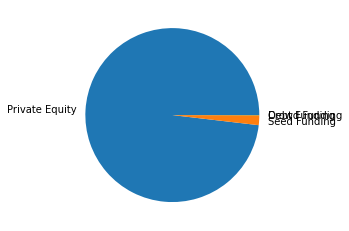

In [8]:
x = final.keys()
y = final.values()

plt.pie(y, labels = x)
plt.show()

### 2. Top Industries

### Problem Statement :

Which type of companies got more easily funding. To answer this question, find -
Top 5 industries and percentage of the total amount funded to that industry. (among top 5 only)
Print the industry name and percentage of the amount funded with 2 decimal place after rounding off.

### Note :

Ecommerce is the right word in IndustryVertical, so correct it.
Print the industry in descending order with respect to the percentage of the amount funded.

### Output Format :

    industry1 percent1
    industry2 percent2
    industry3 percent3
    . . . 


C:\Users\Vaishnavi\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


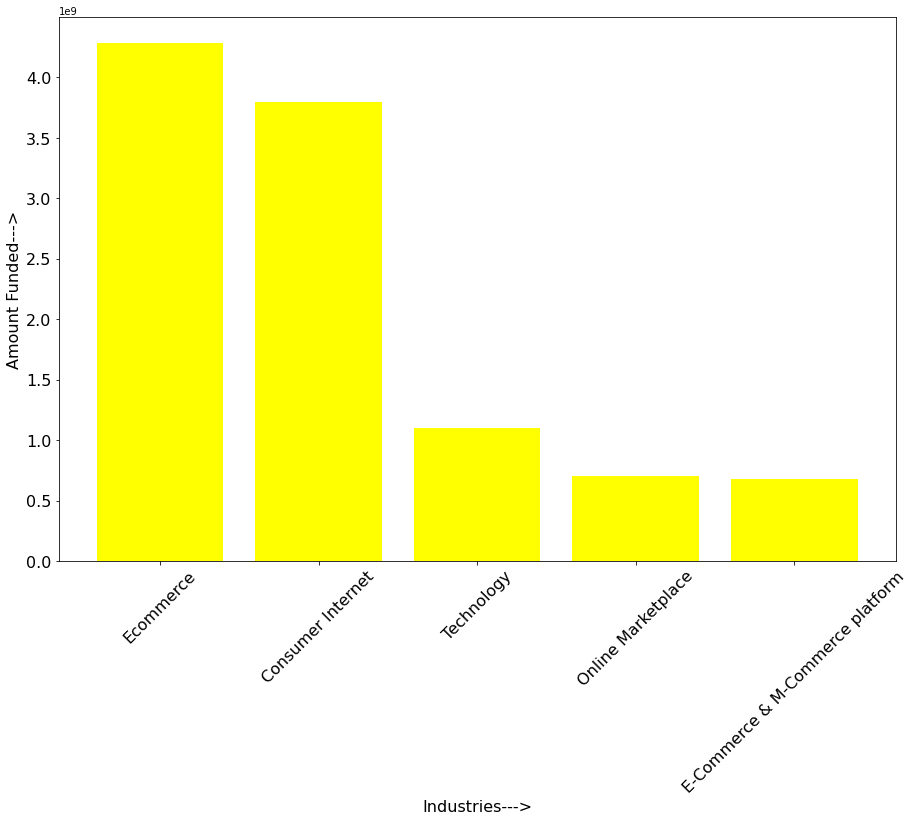

Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



data=pd.read_csv('startup_funding.csv')
df=data.copy()
df.AmountInUSD.loc[df['AmountInUSD'].isnull()]='0'
df.drop(df['SNo'].loc[df.IndustryVertical.isnull()], inplace=True)

np_industry=np.array(df.IndustryVertical)
np_amount=np.array(df.AmountInUSD)

np_industry[np_industry=='eCommerce']='Ecommerce'
np_industry[np_industry=='ECommerce']='Ecommerce'
np_industry[np_industry=='ecommerce']='Ecommerce'

for i in range(len(np_amount)):
    
    np_amount[i]=''.join(np_amount[i].split(','))
    
np_amount=np.array(np_amount, dtype='int64')

dic = dict()

for i in range(len(np_amount)):
    if np_industry[i] in dic.keys():
        dic[np_industry[i]] += np_amount[i]
    else:
        dic[np_industry[i]] = np_amount[i]
xaxis=[]
yaxis=[]

for i in dic.keys():
    xaxis.append(i)
    yaxis.append(dic[i])
np_xaxis=np.array(xaxis)
np_yaxis=np.array(yaxis)

np_xaxis=np_xaxis[np.argsort(np_yaxis)]
np_yaxis=np.sort(np_yaxis)

np_xaxis=np_xaxis[len(np_xaxis)-1:len(np_xaxis)-1-5:-1]
np_yaxis=np_yaxis[len(np_yaxis)-1:len(np_yaxis)-1-5:-1]

plt.subplots(figsize=(15, 10))
plt.bar(np_xaxis, np_yaxis, color='yellow')
plt.xticks(rotation=45, size=16)
plt.xlabel('Industries--->', size=16)
plt.ylabel('Amount Funded--->', size=16)
plt.yticks(size=16)
plt.show()

for i in range(len(np_xaxis)):
    print(np_xaxis[i], format((np_yaxis[i]*100)/sum(np_yaxis) , '.2f'))

### 3. Funding Rounds

Given File 'startup_funding.csv'

### Problem Statement :

Find the top 5 startups who received the most number of funding rounds. That means, startups which got fundings maximum number of times.
Print the startup name in descending order with respect to the number of funding round as integer value.

### Note:
Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. There are many errors in startup names, ignore correcting all, just handle important ones.

### Output Format :

    startup1 number1
    startup2 number2
    startup3 number3
    . . . 

In [10]:
# Open and read data file as specified in the question
# Print the required output in given format

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("startup_funding.csv")

# print(df.StartupName.unique())
startup = np.array(df.StartupName)

df.AmountInUSD.fillna('0', inplace=True)

amount = np.array(df.AmountInUSD)

# df.AmountInUSD
# print(len(amount))
# print(len(startup))
ind = len(startup)

ind = len(startup)
final = {}
for i in range(ind):
    if "Ola" in startup[i]:
        startup[i] = "Ola"
    if "Flipkart" in startup[i]:
        startup[i] = "Flipkart"
    if "Oyo" in startup[i] or 'OYO Rooms' in startup[i]:
        startup[i] = "Oyo"
    if "Paytm" in startup[i]:
        startup[i] = "Paytm"

for i in range(ind):
    value = amount[i].split(",")
    value = "".join(value)

    final[startup[i]] = final.get(startup[i], 0) + 1

final = dict(sorted(final.items(), key=lambda item: item[1], reverse=True))
# print(final)

count = 0
"""for key, value in final.items():
    if count == 5:
        break
    else:
        print(key, value)
    count += 1"""
x = list(final.keys())

temp = x[2]
x[2] = x[3]
x[3] = temp

""""temp = x[4]
x[4] = x[5]
x[5] = temp"""

for key in x[:5]:
    print(key, final[key])



Ola 9
Swiggy 7
Paytm 6
UrbanClap 6
Oyo 6


### 4. Top Investor

Given File 'startup_funding.csv'

### Problem Statement :

Find the Investors who have invested maximum number of times.
Print the investor name and number of times invested as integer value.

### Note:

In startup, multiple investors might have invested. So consider each investor for that startup.
Ignore the undisclosed investors.

### Output Format :

investorname number

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("startup_funding.csv")

df.InvestorsName.fillna("None", inplace = True)
#df.InvestorsName.unique()

In [12]:
investors = np.array(df.InvestorsName)

final = {}
for i in investors:
    key = i.split(",")
    
    
    for i in range(len(key)):
        key[i] = key[i].strip()
        if key[i] != "None" and key[i] != "":
            final[key[i]] = final.get(key[i], 0) + 1

final = dict(sorted(final.items(), key=lambda item: item[1], reverse=True))
#print(final)

for key, value in final.items():
    print(key, value)
    break

Sequoia Capital 64
